In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import numpy as np
import json
import seaborn as sns

plt.style.use('seaborn-v0_8-bright')
plt.style.use('ggplot')

o_df = pd.read_csv("tmdb_5000_movies - PyViz.csv")

o_df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [19]:

# print(df[df['production_companies']==81])

def is_valid_json(s):
    try:
        json.loads(s)
        return True
    except ValueError:
        return False

invalid_json_rows = o_df[~o_df['production_companies'].apply(is_valid_json)]

print(invalid_json_rows)

Empty DataFrame
Columns: [budget, genres, homepage, id, keywords, original_language, original_title, overview, popularity, production_companies, production_countries, release_date, revenue, runtime, spoken_languages, status, tagline, title, vote_average, vote_count]
Index: []


In [49]:
o_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [15]:
o_df[o_df==0].count()

budget                  1037
genres                     0
homepage                   0
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 1
production_companies       0
production_countries       0
release_date               0
revenue                 1427
runtime                   35
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average              63
vote_count                62
Collection Ratio         537
Verdict                    0
dtype: int64

In [59]:
o_df.drop(['homepage', 'tagline'], axis=1, inplace=True)
o_df.dropna(inplace=True)

In [17]:
columns_to_remove_zero = ['runtime', 'vote_average','vote_count','popularity']  

for col in columns_to_remove_zero:
    df = df[df[col] != 0]

df[df==0].count()



budget                   964
genres                     0
homepage                   0
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                 1344
runtime                    0
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
Collection Ratio         526
Verdict                    0
dtype: int64

In [55]:
zero_counts = (o_df == 0).sum()
print(zero_counts)
print(len(o_df))

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64
1248


In [ ]:
# o_df = o_df.replace(0, np.nan)
# o_df = o_df.dropna()

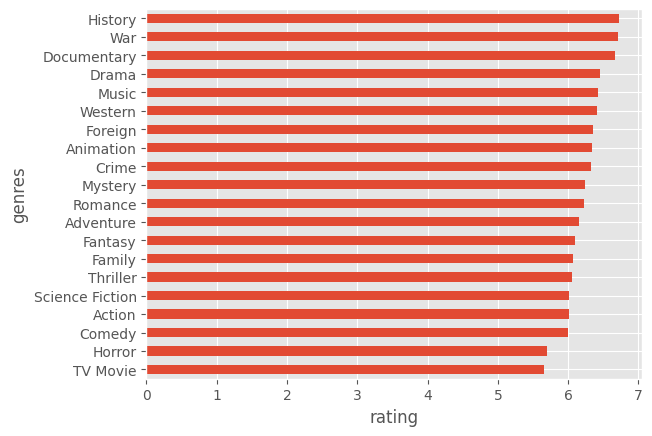

In [60]:
# display mean rating across different genres
df = o_df

df = df[df['vote_average'] != 0]

def f(t):
  s = t['genres']
  s = json.loads(s)
  ls = []
  for i in s:
    ls.append(i['name'])
  return pd.Series(ls)

genre_split = pd.DataFrame.apply(df, f, axis=1)
df = pd.concat([df, genre_split], axis=1)
df_g = df.melt(id_vars=['id', 'title', 'vote_average'],
                value_vars=genre_split.columns)

average_rating = df_g.groupby(['value'])['vote_average'].mean()
average_rating = average_rating.sort_values()
fig, axs  = plt.subplots()
average_rating.plot(y='vote_average', ax=axs, kind='barh')
axs.set_xlabel('rating')
axs.set_ylabel('genres')
plt.show()

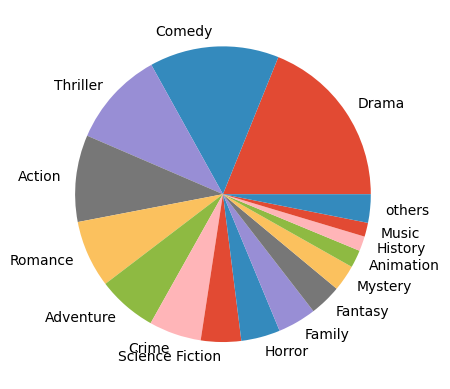

In [65]:
df = o_df

def f(t):
  s = t['genres']
  s = json.loads(s)
  ls = []
  for i in s:
    ls.append(i['name'])
  return pd.Series(ls)

genre_split = pd.DataFrame.apply(df, f, axis=1)
df = pd.concat([df, genre_split], axis=1)
df = df.melt(id_vars=['id', 'title', 'vote_average'],
                value_vars=genre_split.columns)

average_rating = df.groupby(['value'])['vote_average'].count().rename("count")
average_rating = pd.DataFrame(average_rating, columns=['count'])
average_rating = average_rating.sort_values(by='count', ascending=False)
n = 15
average_rating_1 = average_rating.head(n)
average_rating_2 = average_rating[n:]
average_rating_2 = pd.DataFrame(average_rating_2['count'].sum(), index=['others'], columns=['count'])
average_rating = pd.concat([average_rating_1, average_rating_2])
# print(average_rating)
# print(average_rating.loc[average_rating.groupby('count', group_keys=False)['count'].idxmin()])

# average_rating = average_rating.groupby()
fig, axs  = plt.subplots()
average_rating.plot(y='count', ax=axs, kind='pie', legend=False)
axs.set_ylabel('')
axs.set_xlabel('')
plt.show()

C:\Users\rhyth\AppData\Local\Temp\ipykernel_10140\911878658.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['year'] < 2015][df['year'] != 0]


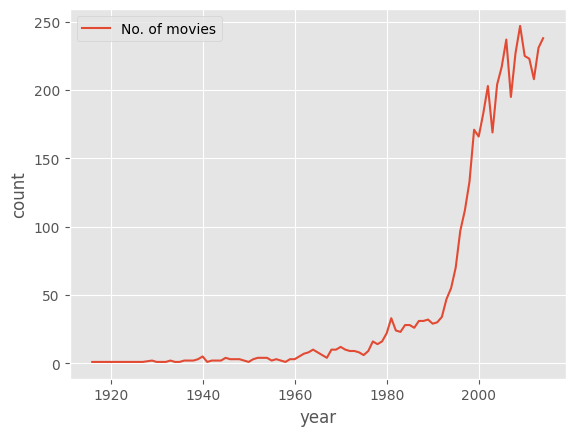

In [14]:
df = o_df
def f2(row):
  if (type(row['release_date'])) == str:
    return pd.Series([int(row['release_date'][:4])], index=['year'])
  else:
    return pd.Series([0], index=['year'])

year = df.apply(f2, axis=1)
df = pd.concat([df, year], axis=1)

df = df[df['year'] < 2015][df['year'] != 0]


year_count = df.groupby(['year']).count()
fig, axs  = plt.subplots()
year_count.plot(y='id', ax=axs, label='No. of movies')
axs.set_ylabel('count')
plt.show()


C:\Users\rhyth\AppData\Local\Temp\ipykernel_19012\272388174.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_year = df.groupby(pd.cut(df['year'], range(1910, 2020, 10)))['vote_average'].mean()


year
(1910, 1920]    7.400000
(1920, 1930]    6.740000
(1930, 1940]    6.968421
(1940, 1950]    6.909524
(1950, 1960]    7.165517
(1960, 1970]    6.863750
(1970, 1980]    6.756303
(1980, 1990]    6.347719
(1990, 2000]    6.184262
(2000, 2010]    6.068818
Name: vote_average, dtype: float64


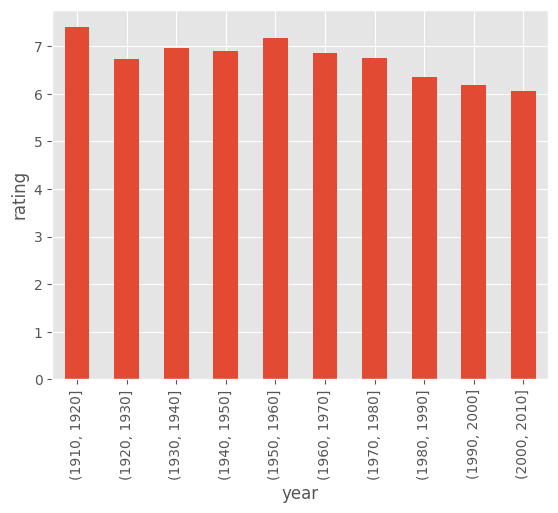

In [6]:
df = o_df
def f3(row):
  if (type(row['release_date'])) == str:
    return pd.Series([int(row['release_date'][:4])], index=['year'])
  else:
    return pd.Series([row['release_date']], index=['year'])

year = df.apply(f3, axis=1)

df = pd.concat([df, year], axis=1)

average_rating_year = df.groupby(pd.cut(df['year'], range(1910, 2020, 10)))['vote_average'].mean()
print(average_rating_year)
fig, axs  = plt.subplots()
average_rating_year.plot(kind='bar')
axs.set_ylabel('rating')
plt.show()


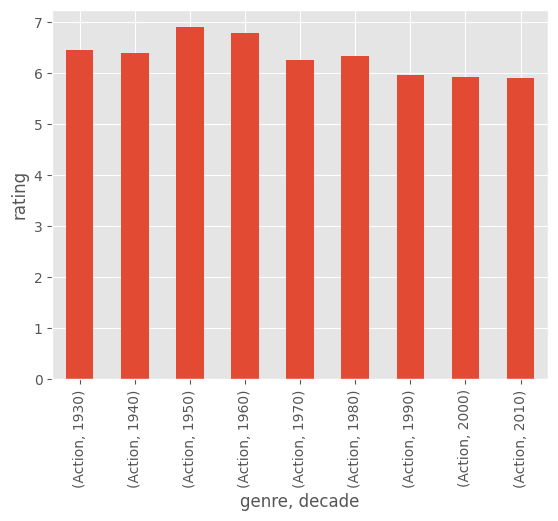

In [7]:
genre = "Action"

df = o_df

def f3(row):
  if (type(row['release_date'])) == str:
    return pd.Series([row['release_date'][:3] + '0'], index=['decade'])
  else:
    return pd.Series([row['release_date']], index=['decade'])

def f(t):
  s = t['genres']
  s = json.loads(s)
  ls = []
  for i in s:
    ls.append(i['name'])
  return pd.Series(ls)

genre_split = pd.DataFrame.apply(df, f, axis=1)
decade = df.apply(f3, axis=1)

df = pd.concat([df, decade, genre_split], axis=1)
df = df.melt(id_vars=['id', 'title', 'vote_average', 'decade'],
                value_vars=genre_split.columns)

df = df[df['value'] == genre]

average_rating_year = df.groupby(['value', 'decade'])\
  ['vote_average'].mean()

fig, axs  = plt.subplots()
average_rating_year.plot(y='vote_average', ax=axs, kind='bar')
axs.set_ylabel('rating')
axs.set_xlabel('genre, decade')
plt.show()

C:\Users\rhyth\AppData\Local\Temp\ipykernel_10916\342138677.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_rating_range = df.groupby(pd.cut(df['vote_average'], range(11))).count()


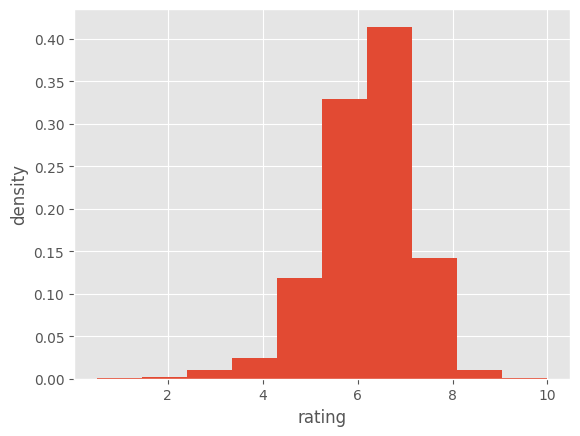

In [56]:
df = o_df
df = df[df['vote_average'] != 0]
count_rating_range = df.groupby(pd.cut(df['vote_average'], range(11))).count()

fig, axs  = plt.subplots()
df['vote_average'].hist(density=True)
axs.set_ylabel('density')
axs.set_xlabel('rating')
plt.show()


2562


Text(0.5, 0, 'release date')

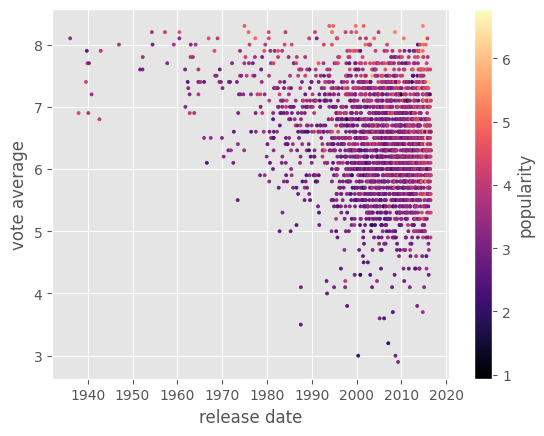

In [36]:
df = o_df
df = df[df['vote_average'] != 0]
df = df.sort_values(by =['vote_average'])[10:-10]
df = df.sort_values('release_date')[10:-10]
df['release_date'] = df['release_date'].apply(pd.to_datetime)
df = df[df['vote_count'] > 200]
print(len(df))

fig, g= plt.subplots()
t = g.scatter(x=df['release_date'], y=df['vote_average'], s=5, c=np.log1p(df['popularity']), cmap='magma')
r = fig.colorbar(t, ax=g)
r.set_label('popularity')
g.set_ylabel('vote average')
g.set_xlabel('release date')

Text(0.5, 0, 'time')

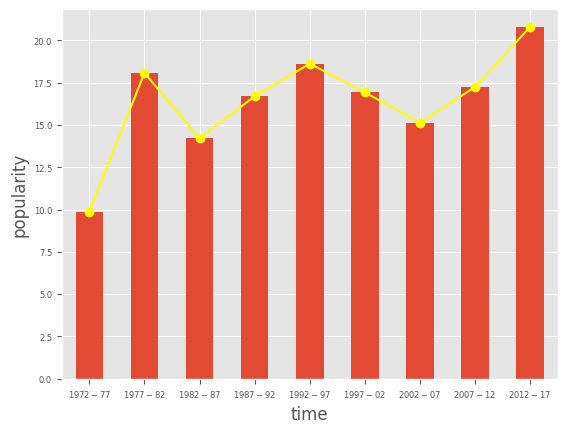

In [9]:
# corelation between popularity and release date
from datetime import datetime
df = o_df
# df['popularity'] = np.log1p(df['popularity'])
df['release_date'] = df['release_date'].apply(pd.to_datetime)
df = df[df['release_date'] > datetime.fromisoformat('1966-12-31')]
df = df[df['popularity'] != 0]
# print(len(k))
df['release_date'] = df['release_date'].apply(pd.to_datetime)
df = df.groupby(pd.Grouper(key='release_date', freq='5Y'))['popularity'].apply(lambda a: a.sort_values()[10:-10].mean())
# df = df.sort_index()
df.index = [f'${str(x.year)[:]}-${str(x.year + 5)[2:]}' for x in df.index]
df = df[1:-1]

g = df.plot(kind='bar')
df.plot(kind='line', c='yellow', marker='o', fontsize=6)
g.set_ylabel('popularity')
g.set_xlabel('time')

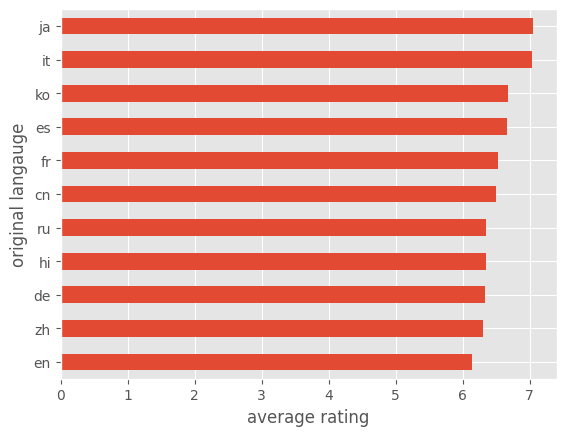

In [23]:

# display mean rating across different genres
df = o_df
df = df[df['vote_average'] != 0]

average_rating = df.groupby(['original_language']) \
  .agg({'runtime': 'count', 'vote_average': 'mean'}) \
  .rename(columns={'runtime': 'count'})
average_rating = average_rating[average_rating['count'] > 10]
average_rating = average_rating['vote_average'].sort_values(ascending=True)
fig, axs  = plt.subplots()
average_rating.plot(y='vote_average', ax=axs, kind='barh')
axs.set_xlabel('average rating')
axs.set_ylabel('original langauge')
plt.show()

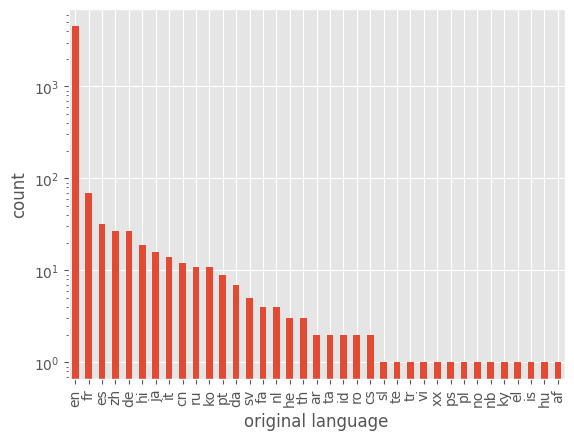

In [221]:

df = o_df

average_rating = df.groupby(['original_language'])['vote_average'].count()
average_rating = average_rating.sort_values(ascending=False)
fig, axs  = plt.subplots()
average_rating.plot(y='vote_average', ax=axs, kind='bar')
axs.set_ylabel('count')
axs.set_yscale('log')
axs.set_xlabel('original language')
plt.show()

value
15th century      2
16th century      3
17th century      3
18th century      7
1910s             4
                 ..
 strange noise    1
Γη                1
卧底肥妈              1
绝地奶霸              1
超级妈妈              1
Name: vote_average, Length: 9793, dtype: int64


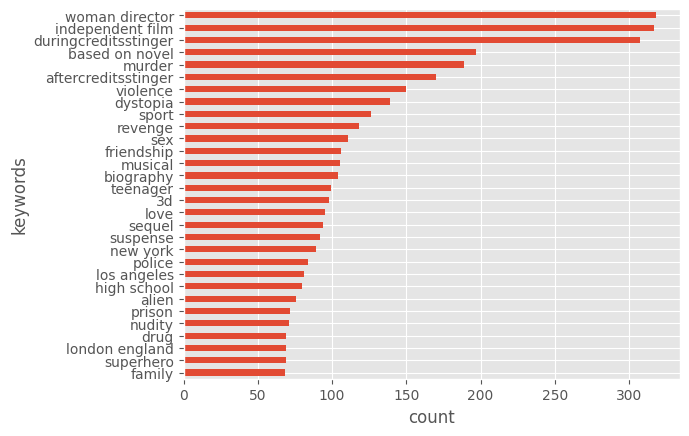

In [133]:
# display mean rating across different genres
df = o_df
df = df[df['vote_average'] != 0]

def f(t):
  s = t['keywords']
  s = json.loads(s)
  ls = []
  for i in s:
    ls.append(i['name'])
  return pd.Series(ls)

keyword_split = pd.DataFrame.apply(df, f, axis=1)
df = pd.concat([df, keyword_split], axis=1)
df = df.melt(id_vars=['vote_average'],
                value_vars=keyword_split.columns)
# print(df)
average_rating = df.groupby(['value'])['vote_average'].count()
print(average_rating)
average_rating = average_rating.sort_values(ascending=False)
average_rating = average_rating.head(30)
average_rating = average_rating.sort_values()
fig, axs  = plt.subplots()
average_rating.plot( ax=axs, kind='barh')
axs.set_xlabel('count')
axs.set_ylabel('keywords')
plt.show()

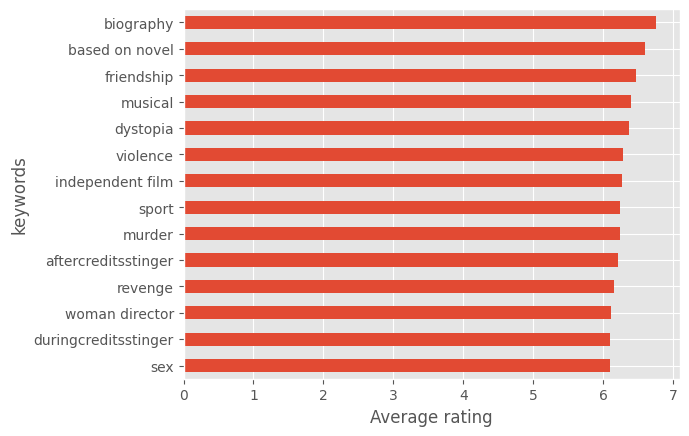

In [2]:
# display mean rating across different keywords
df = o_df

df = df[df['vote_average'] != 0]

def f(t):
  s = t['keywords']
  s = json.loads(s)
  ls = []
  for i in s:
    ls.append(i['name'])
  return pd.Series(ls)

keyword_split = pd.DataFrame.apply(df, f, axis=1)
df = pd.concat([df, keyword_split], axis=1)
df = df.melt(id_vars=['vote_average', 'runtime'],
                value_vars=keyword_split.columns)
# print(df)
average_rating = df.groupby(['value']).agg({'vote_average': 'mean', 'runtime': 'count'}).rename(columns={'runtime':'count'})
average_rating = average_rating[average_rating['count'] > 100]
average_rating = average_rating['vote_average']
# print(average_rating)
average_rating = average_rating.sort_values(ascending=False)
average_rating = average_rating.head(30)
average_rating = average_rating.sort_values()
fig, axs  = plt.subplots()
average_rating.plot( ax=axs, kind='barh')
axs.set_xlabel('Average rating')
axs.set_ylabel('keywords')
plt.show()

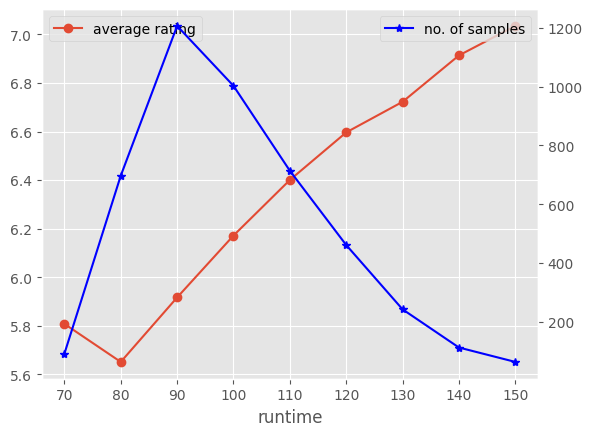

In [11]:
import re
df = o_df
df = df.loc[df['runtime'] != 0].loc[df['vote_average'] != 0]

ma = df['runtime'].max()
mi = df['runtime'].min()
n = 10
df = df.groupby(pd.cut(df['runtime'], range(int(mi // n) * n, int(ma // n) * n, n)),observed=False)\
  .agg({'vote_average': 'mean', 'revenue': 'count'}).rename(columns={'revenue': 'count'})
df = df[df['count'] > 50]
t = df['count']
df = df['vote_average']
df.index = [re.match(r'\((\d+)', str(x)).group(1) for x in df.index]
# fig, axs = plt.subplots(1,2)
g = df.plot(kind='line', marker='o')

a2 = g.twinx()
t.index = df.index
t.plot(kind='line', ax=a2, color='blue', marker='*')
g.set_xlabel('runtime')
a2.grid(False)

g.legend(['average rating'])
a2.legend(['no. of samples'])

# df.plot(kind='line', marker='d', c='yellow')
# g.set_ylabel('average rating')

Text(0, 0.5, 'density')

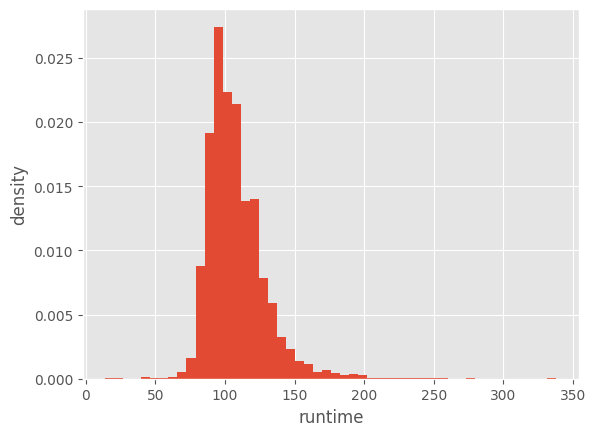

In [19]:
df = o_df

df = df[df['runtime'] != 0]

g = df['runtime'].hist(bins=50, density=True)
g.set_xlabel('runtime')
g.set_ylabel('density')

2787965087 0


Text(0.5, 0, 'revenue')

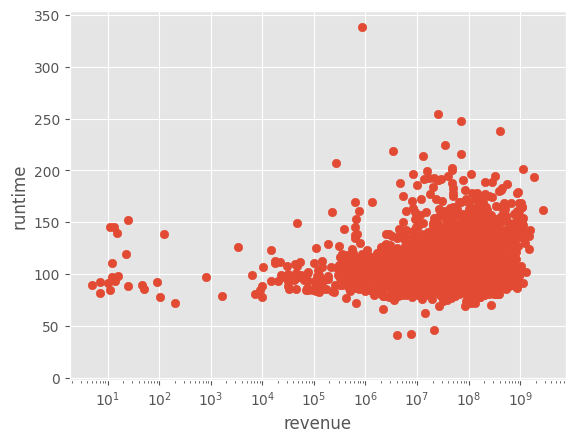

In [34]:
import re
df = o_df

df = df.loc[df['runtime'] != 0]

ma = df['revenue'].max()
mi = df['revenue'].min()


# df['revenue'] = np.log(df['revenue'])


print(ma, mi)
n = 100_000_000
# df = df.groupby(pd.cut(df['revenue'], range(int(mi // n) * n, int(ma // n) * n, n)))['runtime'].mean()
# df.index = [re.match(r'\((\d+)', str(x)).group(1) for x in df.index]
# print(df.head(4))
plt.scatter(x=df['revenue'], y=df['runtime'])
g = plt.gca()
g.set_xscale('log')
g.set_ylabel('runtime')
g.set_xlabel('revenue')

816960000 0
0-1e7    6.220670
1-2e7    6.370364
2-3e7    6.318216
3-4e7    6.430714
Name: vote_average, dtype: float64


C:\Users\rhyth\AppData\Local\Temp\ipykernel_6440\1514523257.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(pd.cut(df['revenue'], range(int(mi // n) * n, int(ma // n) * n, n)))['vote_average'].mean()


Text(0.5, 0, 'revenue')

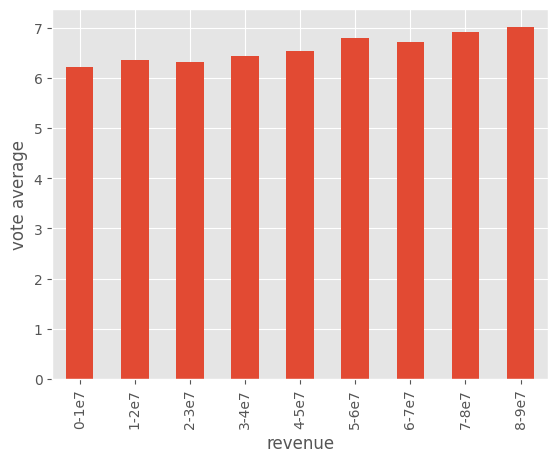

In [3]:
df = o_df

df = df[df['vote_average'] != 0]

df = df.sort_values('revenue')[50:-50]

ma = df['revenue'].max() // 10000 * 10000
mi = df['revenue'].min() // 10000 * 10000

print(ma, mi)
bins = 10
n = (ma - mi) //bins

df = df.groupby(pd.cut(df['revenue'], range(int(mi // n) * n, int(ma // n) * n, n)))['vote_average'].mean()

df.index = [f'{(mi + i*n) // n}-{(mi + (i + 1)*n) // n}e{int(np.log10(n)//1)}' for i in range(len(df.index))]
print(df.head(4))
g = df.plot(kind='bar')
g.set_ylabel('vote average')
g.set_xlabel('revenue')

155000000 850000
850000      3.342002e+07
8557500     5.234117e+07
16265000    6.206056e+07
23972500    7.622143e+07
Name: revenue, dtype: float64


C:\Users\rhyth\AppData\Local\Temp\ipykernel_24856\1049114054.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['budget'] != 0][df['revenue'] != 0]
C:\Users\rhyth\AppData\Local\Temp\ipykernel_24856\1049114054.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(pd.cut(df['budget'], range(int(mi // n) * n, int(ma // n) * n, n)))['revenue'].mean()


Text(0.5, 0, 'budget')

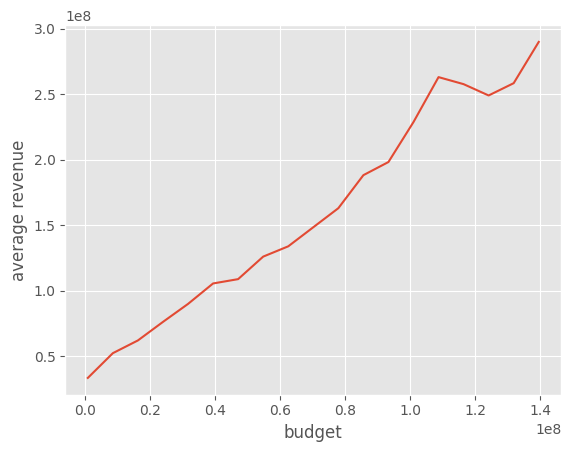

In [31]:
df = o_df

df = df[df['budget'] != 0][df['revenue'] != 0] 

df = df.sort_values('budget')[100:-100]
df = df.sort_values('revenue')[100:-100]

ma = df['budget'].max()
mi = df['budget'].min()

print(ma, mi)

bins = 20

n = (ma - mi) // bins

df = df.groupby(pd.cut(df['budget'], range(int(mi // n) * n, int(ma // n) * n, n)))['revenue'].mean()

df.index = [(mi + i*n) for i in range(len(df.index))]

print(df.head(4))
g = df.plot(kind='line')
g.set_ylabel('average revenue')
g.set_xlabel('budget')

155000000 300000
0-1e6    14.306436
1-2e6    18.204431
2-3e6    20.568355
3-4e6    23.412254
Name: popularity, dtype: float64


C:\Users\rhyth\AppData\Local\Temp\ipykernel_6440\1747000580.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(pd.cut(df['budget'], range(int(mi // n) * n, int(ma // n) * n, n)))['popularity'].mean()


Text(0.5, 0, 'budget')

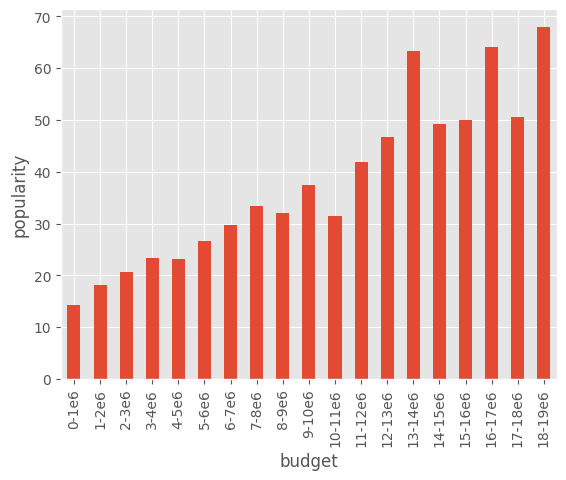

In [4]:
df = o_df

df= df.loc[df['budget']  != 0]
df = df.sort_values('budget')[100:-100]

ma = df['budget'].max()
mi = df['budget'].min()


print(ma, mi)
bins = 20
n = (ma - mi) // bins

df = df.groupby(pd.cut(df['budget'], range(int(mi // n) * n, int(ma // n) * n, n)))['popularity'].mean()

df.index = [f'{(mi + i*n) // n}-{(mi + (i + 1)*n) // n}e{int(np.log10(n) // 1)}' for i in range(len(df.index))]

print(df.head(4))
g =df.plot(kind='bar')
g.set_ylabel('popularity')
g.set_xlabel('budget')

C:\Users\rhyth\AppData\Local\Temp\ipykernel_10916\3715564648.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = df.groupby(pd.cut(df['vote_average'], range(11)))['popularity'].mean()


Text(0, 0.5, 'popularity')

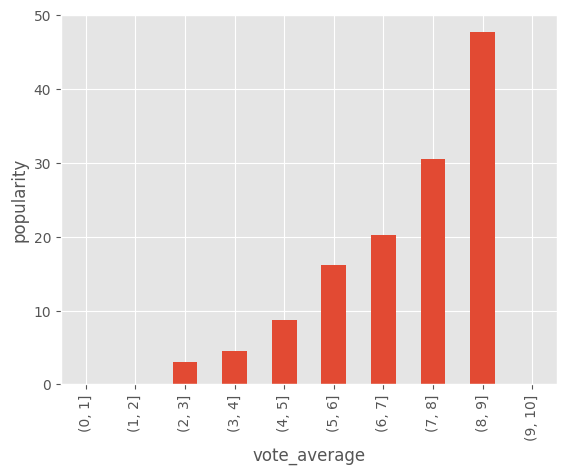

In [38]:
df = o_df

df = df[df['vote_average'] != 0]

df = df.sort_values('vote_average')[10: -10]
df = df.sort_values('popularity')[100:-100]

fig, axs = plt.subplots()

df = df.groupby(pd.cut(df['vote_average'], range(11)))['popularity'].mean()

df.plot(kind='bar', ax=axs)
axs.set_ylabel('popularity')

C:\Users\rhyth\AppData\Local\Temp\ipykernel_24856\3972667437.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['budget'] > n][df['revenue'] > n][df['vote_average'] != 0]
C:\Users\rhyth\AppData\Local\Temp\ipykernel_24856\3972667437.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['budget'] > n][df['revenue'] > n][df['vote_average'] != 0]


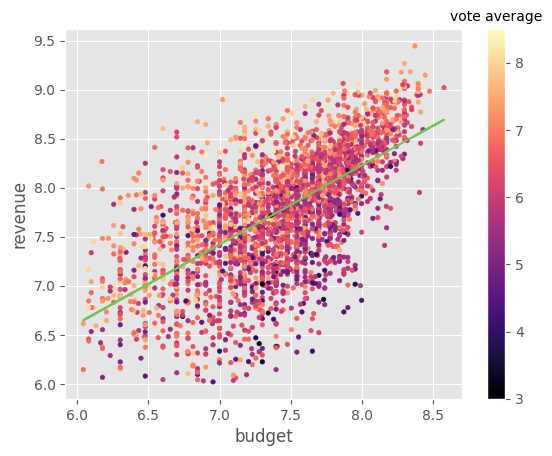

In [30]:
df = o_df
n = 10_00_000
# filtering the data
df = df[df['budget'] > n][df['revenue'] > n][df['vote_average'] != 0]
x = df['budget']
y = df['revenue']

# setting the logarithmic scale
x = np.log10(x)
y = np.log10(y)

# calculating the regression line
m, b = np.polyfit(x, y, 1)
ax = plt.gca()
out = ax.scatter(x, y, c=df['vote_average'], s=10, cmap='magma')
clb = plt.colorbar(out, ax=ax)
clb.ax.set_title('vote average', fontsize=10)

ax.set_xlabel('budget')
ax.set_ylabel('revenue')
ax.plot(x, m*x + b, c='#74c451')
# fig, axs = plt.subplots()
# axs.hist(df['vote_average'], density=True)

C:\Users\rhyth\AppData\Local\Temp\ipykernel_19012\3808108697.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['vote_average'] > 2 ][df['popularity'] > n]
C:\Users\rhyth\AppData\Local\Temp\ipykernel_19012\3808108697.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=10, cmap='magma')


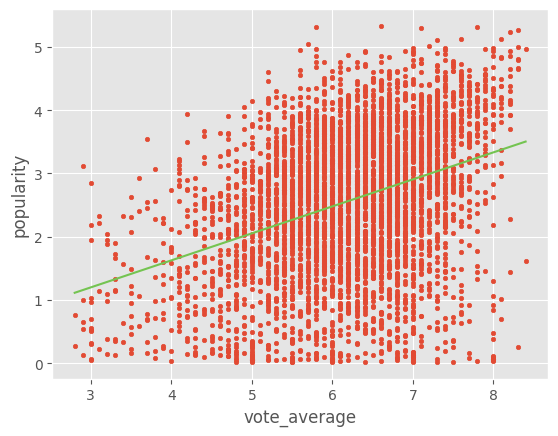

In [195]:
import seaborn as sns
from matplotlib import colormaps
df = o_df
n = 0.2
n = 0
k = 8
# filtering the data
df = df[df['vote_average'] > 2 ][df['popularity'] > n]
df = df.sort_values('popularity', ascending=False)[k:-k]
df = df.sort_values('vote_average', ascending=False)[k:-k]
x = df['vote_average']
y = df['popularity']

# setting the logarithmic scale
y = np.log1p(y)

# calculating the regression line
m, b = np.polyfit(x, y, 1)
ax = plt.gca()
ax.scatter(x, y, s=10, cmap='magma')


ax.set_xlabel('vote_average')
ax.set_ylabel('popularity')
ax.plot(x, m*x + b, c='#74c451')

# fig, axs = plt.subplots()
# axs.hist(df['vote_average'], density=True)

C:\Users\Hriti\AppData\Local\Temp\ipykernel_13192\1153987498.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'average rating')

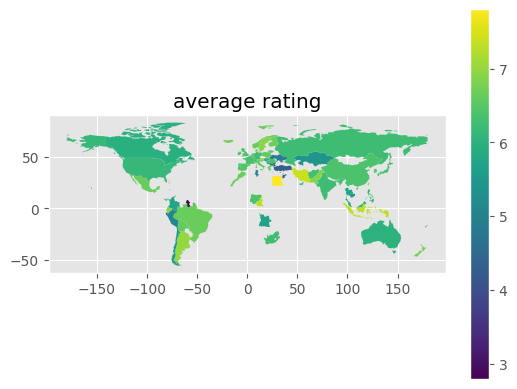

In [3]:
import geopandas
df = o_df

df = df[df['vote_average'] != 0]
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
def f(t):
  s = t['production_countries']
  s = json.loads(s)
  ls = []
  for i in s:
    ls.append(i['name'])
  return pd.Series(ls)

country_split = pd.DataFrame.apply(df, f, axis=1)
df = pd.concat([df, country_split], axis=1)
df = df.melt(id_vars=['id', 'title', 'vote_average'],
                value_vars=country_split.columns)
df = df.groupby(['value'])['vote_average'].mean()
df = df.sort_index(ascending=False).rename('name')
df = pd.DataFrame(df, columns=['average_rating', 'name'])
df['average_rating'] = df['name']
df['name'] = df.index
world = world.merge(df)
# world.plot()
world.head(5)
# world.plot()
g= world.plot('average_rating', legend=True)
g.set_title('average rating')

C:\Users\Hriti\AppData\Local\Temp\ipykernel_6060\3088481194.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'no. of movies')

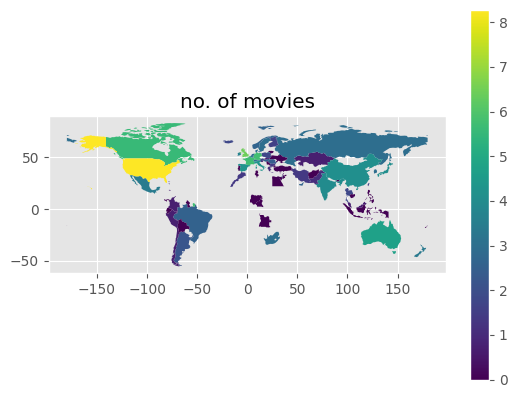

In [12]:
import geopandas

df = o_df

df = df[df['vote_average'] != 0]
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
def f(t):
  s = t['production_countries']
  s = json.loads(s)
  ls = []
  for i in s:
    ls.append(i['name'])
  return pd.Series(ls)

country_split = pd.DataFrame.apply(df, f, axis=1)
df = pd.concat([df, country_split], axis=1)
df = df.melt(id_vars=['id', 'title', 'vote_average'],
                value_vars=country_split.columns)
df = df.groupby(['value'])['vote_average'].count()
df = df.sort_index(ascending=False).rename('name')
df = pd.DataFrame(df, columns=['average_rating', 'name'])
df['average_rating'] = np.log(df['name'])
df['name'] = df.index
world = world.merge(df)
# world.plot()
world.head(5)
# world.plot()
g = world.plot('average_rating', legend=True)
g.set_title('no. of movies')

In [45]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64
0
0
count    3762.000000
mean      109.382509
std        20.605192
min        41.000000
25%        95.000000
50%       106.000000
75%       120.000000
max       338.000000
Name: runtime, dtype: float64
120.0 95.0
25.0
57.5 157.5


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3471,6000000,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,57612,"[{""id"": 630, ""name"": ""dolphin""}, {""id"": 4676, ...",en,Dolphins and Whales: Tribes of the Ocean,This documentary goes to coral reefs of the Ba...,0.041651,"[{""name"": ""3D Entertainment"", ""id"": 5313}, {""n...","[{""iso_3166_1"": ""BS"", ""name"": ""Bahamas""}, {""is...",15-02-2008,7518876,42.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Dolphins and Whales: Tribes of the Ocean,8.0,3
3626,5000000,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,78394,"[{""id"": 10506, ""name"": ""prehistoric""}, {""id"": ...",en,Sea Rex 3D: Journey to a Prehistoric World,"Through the power of IMAX 3D, experience a won...",4.498368,"[{""name"": ""N3D Land Productions"", ""id"": 29943}...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",14-05-2010,4074023,41.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The T-Rex of the Seas come alive.,Sea Rex 3D: Journey to a Prehistoric World,5.9,11
4756,50000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",http://www.cthulhulives.org/cocmovie/index.html,20981,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 303...",en,The Call of Cthulhu,A dying professor leaves his great-nephew a co...,1.777148,"[{""name"": ""HPLHS"", ""id"": 17827}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",01-01-2005,0,47.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Call of Cthulhu,6.9,41


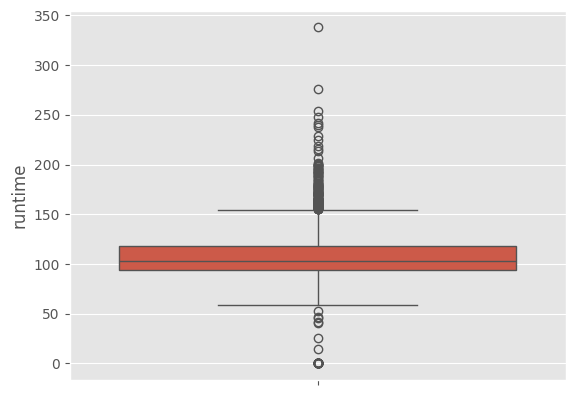

In [12]:
sns.boxplot(y='runtime', data=o_df)
print(o_df['runtime'].describe())
print(df['runtime'].isnull().sum())
df.dropna(subset=['runtime'], inplace=True)
print(df['runtime'].isnull().sum())
df=df[df['runtime'] != 0]
print(df['runtime'].describe())
Q1 = np.percentile(df['runtime'], 25)
Q3 = np.percentile(df['runtime'], 75)



# Calculate IQR
IQR = Q3 - Q1
print(Q3, Q1)
print(IQR)

# Calculate the lower bound and the upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

# Filter the data   
outliers_lower = df[(df['runtime'] < lower_bound) & (df['runtime'] != 0)]
outliers_upper = df[ df['runtime'] > upper_bound ]
# print(outliers.)
outliers_lower.head()
outliers_upper.head()
outliers_lower.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",01-05-2007,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",24-11-2010,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

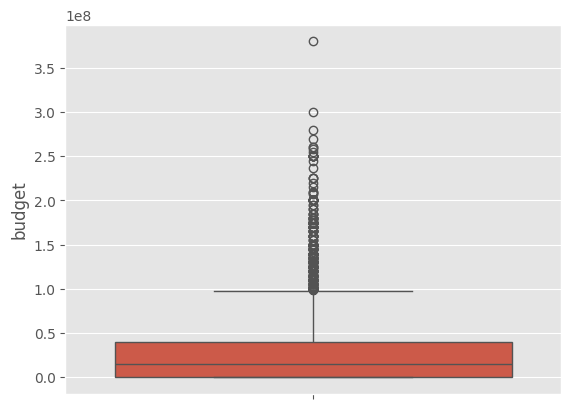

In [3]:
df=o_df[o_df['budget'] != 0]
sns.boxplot(y='budget',data=o_df)

Q1 = np.percentile(df['budget'], 25)
Q3 = np.percentile(df['budget'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower bound and the upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data   
outliers_lower = df[(df['budget'] < lower_bound) & (df['budget'] != 0)]
outliers_upper = df[ df['budget'] > upper_bound ]
# print(outliers.)

outliers_upper.head(10)
# outliers_lower.head(50)

<Axes: ylabel='revenue'>

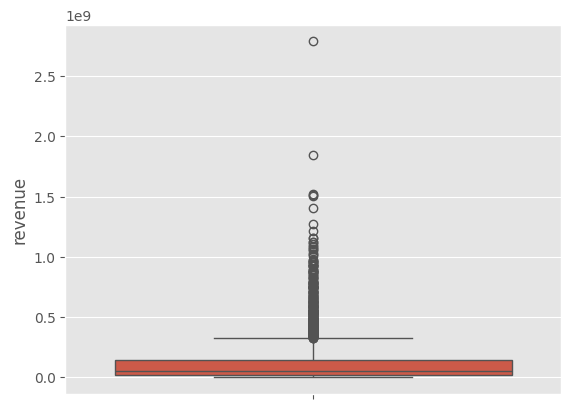

In [11]:
df=o_df[o_df['revenue'] != 0]
df.head(5)
sns.boxplot(y='revenue',data=df)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count


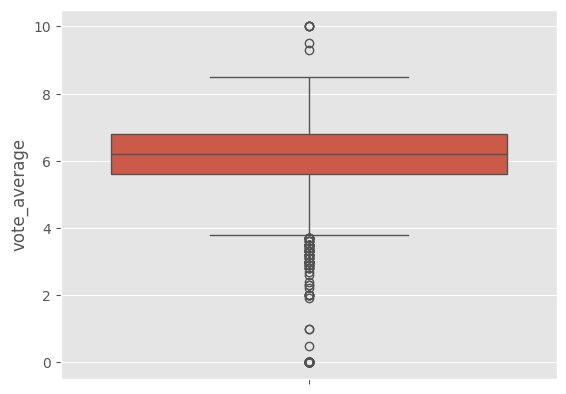

In [30]:
df=o_df[o_df['vote_average'] != 0]
sns.boxplot(y='vote_average',data=o_df)



In [14]:
Q1 = np.percentile(df['vote_average'], 25)
Q3 = np.percentile(df['vote_average'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the lower bound and the upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data   
outliers_lower = df[(df['vote_average'] < lower_bound) & (df['vote_average'] != 0)]
outliers_upper = df[ df['vote_average'] > upper_bound ]
# print(outliers.)
outliers_lower.head()
print(len(outliers_upper))
outliers_upper.head(20)
# outliers_lower['vote'].head(50)


1


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],07-07-2015,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2


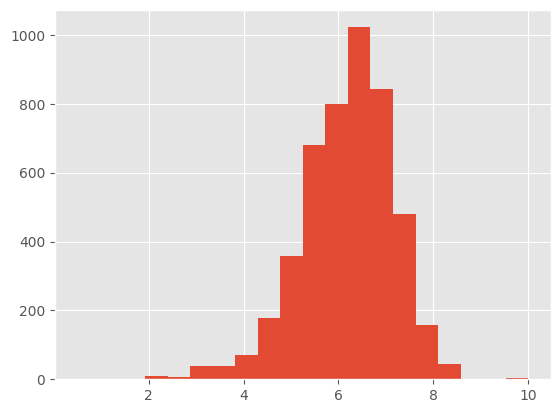

10.0

In [27]:
Q2 = np.percentile(df['vote_average'], 50)
plt.hist(df['vote_average'], bins=20)
plt.show()
df['vote_average'].min()
df['vote_average'].max()

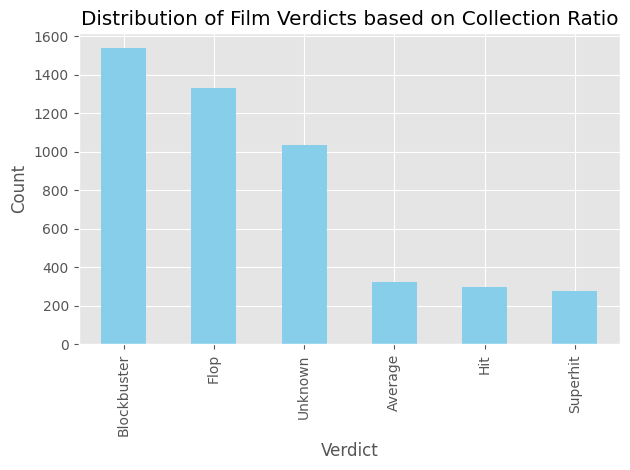

In [5]:
df= o_df
df['Collection Ratio'] = df['revenue'] / df['budget']
df['Collection Ratio'] = df['Collection Ratio'].replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN

# Categorize Collection Ratio
def categorize_verdict(collection_ratio):
    if collection_ratio is None or np.isnan(collection_ratio):
        return 'Unknown'
    elif collection_ratio <= 1:
        return 'Flop'
    elif 1.01 <= collection_ratio <= 1.50:
        return 'Average'
    elif 1.51 <= collection_ratio <= 2.00:
        return 'Hit'
    elif 2.01 <= collection_ratio <= 2.50:
        return 'Superhit'
    else:
        return 'Blockbuster'

df['Verdict'] = df['Collection Ratio'].apply(categorize_verdict)

# Plotting
verdict_counts = df['Verdict'].value_counts()
verdict_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Verdict')
plt.ylabel('Count')
plt.title('Distribution of Film Verdicts based on Collection Ratio')

# Display the plot
plt.tight_layout()
plt.show()

In [13]:
df[df['revenue']==0]
df[df['budget']==0]


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Collection Ratio,Verdict
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",NaN,10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...",...,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366,NaN,Unknown
321,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,77953,"[{""id"": 6078, ""name"": ""politics""}, {""id"": 6083...",en,The Campaign,Two rival politicians compete to win an electi...,16.460356,"[{""name"": ""Everyman Pictures"", ""id"": 2242}, {""...",...,104907746,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,May The Best Loser Win.,The Campaign,5.6,578,NaN,Unknown
359,0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",http://www.foxmovies.com/movies/alvin-and-the-...,258509,"[{""id"": 10986, ""name"": ""chipmunk""}, {""id"": 109...",en,Alvin and the Chipmunks: The Road Chip,"Through a series of misunderstandings, Alvin, ...",27.867368,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,233755553,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fast & furry-ous,Alvin and the Chipmunks: The Road Chip,5.8,428,NaN,Unknown
406,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 16, ""name...",http://www.arthurchristmas.com/,51052,"[{""id"": 65, ""name"": ""holiday""}, {""id"": 1991, ""...",en,Arthur Christmas,"Each Christmas, Santa and his vast army of hig...",19.836830,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,0,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Ever wonder how 2 Billion presents get deliver...,Arthur Christmas,6.7,333,NaN,Unknown
409,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",NaN,16858,"[{""id"": 837, ""name"": ""show business""}, {""id"": ...",en,All That Jazz,Bob Fosse's semi-autobiographical film celebra...,5.159407,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,37823676,123.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All that work. All that glitter. All that pain...,All That Jazz,7.3,85,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,124606,"[{""id"": 10726, ""name"": ""gang""}, {""id"": 33928, ...",en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...",...,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Sometimes you've got to break the rules,Bang,6.0,1,NaN,Unknown
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],...,0,80.0,[],Released,NaN,Cavite,7.5,2,NaN,Unknown
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...",...,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,NaN,Unknown
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],...,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,Unknown
